In [1]:
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
def show_accuracy(a,b):
    acc=a.ravel()==b.ravel()
    print('accuracy: %.2f%%' % (100*float(acc.sum())/acc.size))

In [4]:
path = r'F:\study\ml\DoctorZou\14SVM_II\14.SVM(代码)\14.SVM\14.bipartition.txt'
data = np.loadtxt(path, dtype=np.float, delimiter='\t')
x, y = np.split(data, (2, ), axis=1)
y[y == 0] = -1
y = y.ravel()

In [6]:
clfs = [
    svm.SVC(C=0.3, kernel='linear'),
    svm.SVC(C=10, kernel='linear'),
    svm.SVC(C=5,kernel='rbf',gamma=1),
    svm.SVC(C=5,kernel='rbf',gamma=4)
]

In [7]:
titles = 'Linear,C=0.3', 'Linear, C=10', 'RBF, gamma=1', 'RBF, gamma=4'

In [8]:
x1_min,x1_max=x[:,0].min(),x[:,0].max()
x2_min,x2_max=x[:,1].min(),x[:,1].max()
x1,x2=np.mgrid[x1_min:x1_max:500j,x2_min:x2_max:500j]
grid_test=np.stack((x1.flat,x2.flat),axis=1)

In [9]:
cm_light = matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])

accuracy: 73.00%
num support vector: [37 37]
coef support vector: [[-0.3        -0.3        -0.3        -0.3        -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.29815268 -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.3        -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.19648412 -0.3        -0.3        -0.3
  -0.3        -0.3        -0.3        -0.3        -0.3        -0.3        -0.3
  -0.3        -0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3         0.3         0.3         0.3
   0.24836591  0.3         0.24627088  0.3         0.3         0.3         0.3
   0.3         0.3         0.3         0.3       ]]
support vector: [ 0  1  2  4  5  6  8 11 12 13 14 15 16 17 18 20 21 22 23 24 25 26 27 28 29


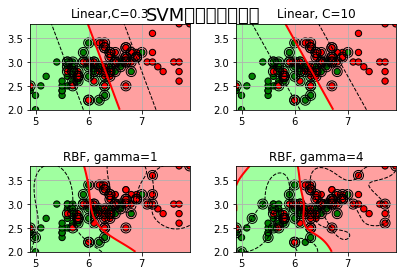

In [12]:
for i, clf in enumerate(clfs):
    clf.fit(x, y)
    y_hat = clf.predict(x)
    show_accuracy(y_hat, y)
    print('num support vector:', clf.n_support_)
    print('coef support vector:', clf.dual_coef_)
    print('support vector:', clf.support_)
    ######################
    plt.subplot(2, 2, i + 1)
    grid_hat = clf.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape)
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)
    plt.scatter(x[clf.support_, 0],
                x[clf.support_, 1],
                edgecolors='k',
                facecolors='none',
                s=100,
                marker='o')
    z = clf.decision_function(grid_test)
    z = z.reshape(x1.shape)
    plt.contour(x1,
                x2,
                z,
                colors=list('krk'),
                linestyles=['--', '-', '--'],
                linewidths=[1, 2, 1],
                levels=[-1, 0, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(titles[i])
    plt.grid()
plt.suptitle(u'SVM不同参数的分类', fontsize=18)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()